# Análise de Fatores de Risco para AVC
##1. Introdução
Este projeto tem como objetivo identificar padrões e possíveis fatores associados ao risco de AVC (Acidente Vascular Cerebral), com base em dados clínicos e demográficos de pacientes.

Fonte dos dados:
Stroke Prediction Dataset – Kaggle
(Importado diretamente via GitHub)

Tecnologias utilizadas:

Python (Pandas, Seaborn, Matplotlib) para análise e visualização

Power BI Web para criação de dashboards interativos

GitHub para versionamento e publicação

## 2. Importação das Bibliotecas e do Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 3. Entendimento Inicial dos Dados
Incluiu:

Inspeção geral com head(), tail() e shape

Análise de tipos (info()), estatísticas (describe())

Verificação de dados ausentes e duplicados

Confirmação da integridade das colunas e variáveis

In [ ]:
#importando dados do arquivo raw
url = 'https://raw.githubusercontent.com/danoliveiraed/portfolio-projects/refs/heads/main/stroke-risk-analysis/data/raw/healthcare-dataset-stroke-data.csv'

dado = pd.read_csv(url, sep=',')
dado.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


In [ ]:
dado.tail(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [ ]:
#verificando tipos dos dados
dado.shape
dado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
#verificando dados nulos
dado.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [ ]:
#verificando dados duplicados
dado.duplicated().sum()

np.int64(0)

In [ ]:
dado.count()

,0
id,5110
gender,5110
age,5110
hypertension,5110
heart_disease,5110
ever_married,5110
work_type,5110
Residence_type,5110
avg_glucose_level,5110
bmi,4909


## 4. Limpeza e Pré-processamento
**Tratamentos realizados:**

* Preenchimento de valores nulos na coluna bmi com a média por gênero

* Renomeação das colunas para nomes mais descritivos (em português)

* Conversão de colunas categóricas (astype('category'))

* Criação de variáveis derivadas para enriquecer as análises:

* faixa_etaria

* imc_categoria

* glicose_categoria

* fumante_simples (padronização)

* risco_combinado (flag composta de risco)

* avc_str (para visualização textua

In [ ]:
#prencher bmi com média por gênero
dado['bmi'] = dado.groupby('gender')['bmi'].transform(
    lambda x: x.fillna(x.mean())
)
dado.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


In [ ]:
#renomeando colunas para nomes amigáveis
dado = dado.rename(columns={
    'gender': 'genero',
    'age': 'idade',
    'hypertension': 'hipertensao',
    'heart_disease': 'doenca_cardiaca',
    'ever_married': 'casado',
    'work_type': 'tipo_trabalho',
    'Residence_type': 'tipo_residencia',
    'avg_glucose_level': 'glicose_media',
    'bmi': 'imc',
    'smoking_status': 'tabagismo',
    'stroke': 'avc'
})
dado.head(1)

,id,genero,idade,hipertensao,doenca_cardiaca,casado,tipo_trabalho,tipo_residencia,glicose_media,imc,tabagismo,avc
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


In [ ]:
#transformando colunas para categorias
col_categoria = ['genero',
    'casado',
    'tipo_trabalho',
    'tipo_residencia',
    'tabagismo']

dado[col_categoria] = dado[col_categoria].astype('category')
dado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   id               5110 non-null   int64   
 1   genero           5110 non-null   category
 2   idade            5110 non-null   float64 
 3   hipertensao      5110 non-null   int64   
 4   doenca_cardiaca  5110 non-null   int64   
 5   casado           5110 non-null   category
 6   tipo_trabalho    5110 non-null   category
 7   tipo_residencia  5110 non-null   category
 8   glicose_media    5110 non-null   float64 
 9   imc              5110 non-null   float64 
 10  tabagismo        5110 non-null   category
 11  avc              5110 non-null   int64   
dtypes: category(5), float64(3), int64(4)
memory usage: 305.3 KB


## 5. Análise Exploratória (EDA)
### 5.1 Perfil demográfico e clínico
**Distribuições e segmentações realizadas:**

* Faixa etária

* IMC (classificado)

* Glicose (classificado)

* Frequência de hipertensão, doenças cardíacas e tabagismo

In [ ]:
#segmentação por idade
dado['faixa_etaria'] = pd.cut(dado['idade'],
                              bins = [0,18,35,50,65,120],
                              labels = ['0-18', '19-35', '36-50', '51-65', '65+'])
#classificação por peso
dado['imc_categoria'] = pd.cut(dado['imc'],
                               bins = [0, 18.5, 25, 30, 35, 40, float('inf')],
                               labels=['Abaixo do peso', 'Normal', 'Sobrepeso', 'Obesidade I', 'Obesidade II', 'Obesidade III'])
#Segmentação por níveis glicemicos
dado['glicose_categoria'] = pd.cut(dado['glicose_media'],
                                   bins = [0, 99, 125, 200, float('inf')],
                                   labels=['Normal', 'Pré-diabetes', 'Diabetes', 'Extremo'])
#Simplificação de campo
dado['fumante_simples'] = dado['tabagismo'].replace({
    'formerly smoked': 'fumante',
    'smokes': 'fumante',
    'never smoked': 'não fumante',
    'Unknown': 'desconhecido'
})
#Flag de risco combinado
dado['risco_combinado'] = (
    (dado['hipertensao'] == 1) &
    (dado['doenca_cardiaca'] == 1) &
    (dado['glicose_media'] > 140)
)
#Classificar avc com nome amigavel
dado['avc_str'] = dado['avc'].replace({0: 'Sem AVC', 1: 'Com AVC'})


dado.head(3)

/tmp/ipython-input-12-732972424.py:14: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  dado['fumante_simples'] = dado['tabagismo'].replace({


,id,genero,idade,hipertensao,doenca_cardiaca,casado,tipo_trabalho,tipo_residencia,glicose_media,imc,tabagismo,avc,faixa_etaria,imc_categoria,glicose_categoria,fumante_simples,risco_combinado,avc_str
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,65+,Obesidade II,Extremo,fumante,False,Com AVC
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.065758,never smoked,1,51-65,Sobrepeso,Extremo,não fumante,False,Com AVC
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,65+,Obesidade I,Pré-diabetes,não fumante,False,Com AVC


### 5.2 Comparações com a variável alvo (stroke)
**Foram realizadas agregações da média de AVC por:**

* Faixa etária

* Gênero

* Hipertensão

* Doença cardíaca

* Tabagismo

* Tipo de residência

Esses agrupamentos foram consolidados em um único DataFrame comparativo e utilizados para criar um gráfico de barras multivariado com seaborn.

In [ ]:
#agregação por faixa etária
df_avc_faixa_etaria = dado.groupby('faixa_etaria')['avc'].mean().reset_index()
df_avc_faixa_etaria.columns = ['faixa_etaria', 'taxa_avc']
df_avc_faixa_etaria

/tmp/ipython-input-13-1875717278.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_avc_faixa_etaria = dado.groupby('faixa_etaria')['avc'].mean().reset_index()


,faixa_etaria,taxa_avc
0,0-18,0.002183
1,19-35,0.001017
2,36-50,0.018450
3,51-65,0.060241
4,65+,0.161658


In [ ]:
#agregação por gênero
df_avc_genero = dado.groupby('genero')['avc'].mean().reset_index()
df_avc_genero.columns = ['genero', 'taxa_avc']
df_avc_genero

/tmp/ipython-input-14-1790706141.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_avc_genero = dado.groupby('genero')['avc'].mean().reset_index()


,genero,taxa_avc
0,Female,0.047094
1,Male,0.051064
2,Other,0.000000


In [ ]:
#agregação por hipertensao
df_avc_hipertensao = dado.groupby('hipertensao')['avc'].mean().reset_index()
df_avc_hipertensao.columns = ['hipertensao', 'taxa_avc']
df_avc_hipertensao

,hipertensao,taxa_avc
0,0,0.039679
1,1,0.132530


In [ ]:
#agregação por doença cardiaca
df_avc_cardiaco = dado.groupby('doenca_cardiaca')['avc'].mean().reset_index()
df_avc_cardiaco.columns = ['doenca_cardiaca', 'taxa_avc']
df_avc_cardiaco

,doenca_cardiaca,taxa_avc
0,0,0.041787
1,1,0.170290


In [ ]:
#agregação por tabagista simples
df_avc_tabagista = dado.groupby('fumante_simples')['avc'].mean().reset_index()
df_avc_tabagista.columns = ['fumante', 'taxa_avc']
df_avc_tabagista

/tmp/ipython-input-17-4196320414.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_avc_tabagista = dado.groupby('fumante_simples')['avc'].mean().reset_index()


,fumante,taxa_avc
0,desconhecido,0.030440
1,fumante,0.066906
2,não fumante,0.047569


In [ ]:
#agregação por tipo de residência
df_avc_residencia = dado.groupby('tipo_residencia')['avc'].mean().reset_index()
df_avc_residencia.columns = ['residencia', 'taxa_avc']
df_avc_residencia

/tmp/ipython-input-18-3690934748.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_avc_residencia = dado.groupby('tipo_residencia')['avc'].mean().reset_index()


,residencia,taxa_avc
0,Rural,0.045346
1,Urban,0.052003


In [ ]:
def preparar_df(df, coluna_categoria, nome_fator):
    df_ = df.rename(columns={coluna_categoria: 'categoria'})
    df_['fator'] = nome_fator
    return df_[['fator', 'categoria', 'taxa_avc']]

In [ ]:
# Aplicar nos seus DataFrames já existentes
df_faixa = preparar_df(df_avc_faixa_etaria, 'faixa_etaria', 'Faixa Etária')
df_genero = preparar_df(df_avc_genero, 'genero', 'Gênero')
df_hiper = preparar_df(df_avc_hipertensao, 'hipertensao', 'Hipertensão')
df_cardio = preparar_df(df_avc_cardiaco, 'doenca_cardiaca', 'Doença Cardíaca')
df_tabaco = preparar_df(df_avc_tabagista, 'fumante', 'Tabagismo')
df_resid = preparar_df(df_avc_residencia, 'residencia', 'Residência')

In [ ]:
# Juntar todos
df_comparativo = pd.concat([df_faixa, df_genero, df_hiper,
                            df_cardio, df_tabaco, df_resid], ignore_index=True)
df_comparativo.head(3)

,fator,categoria,taxa_avc
0,Faixa Etária,0-18,0.002183
1,Faixa Etária,19-35,0.001017
2,Faixa Etária,36-50,0.018450


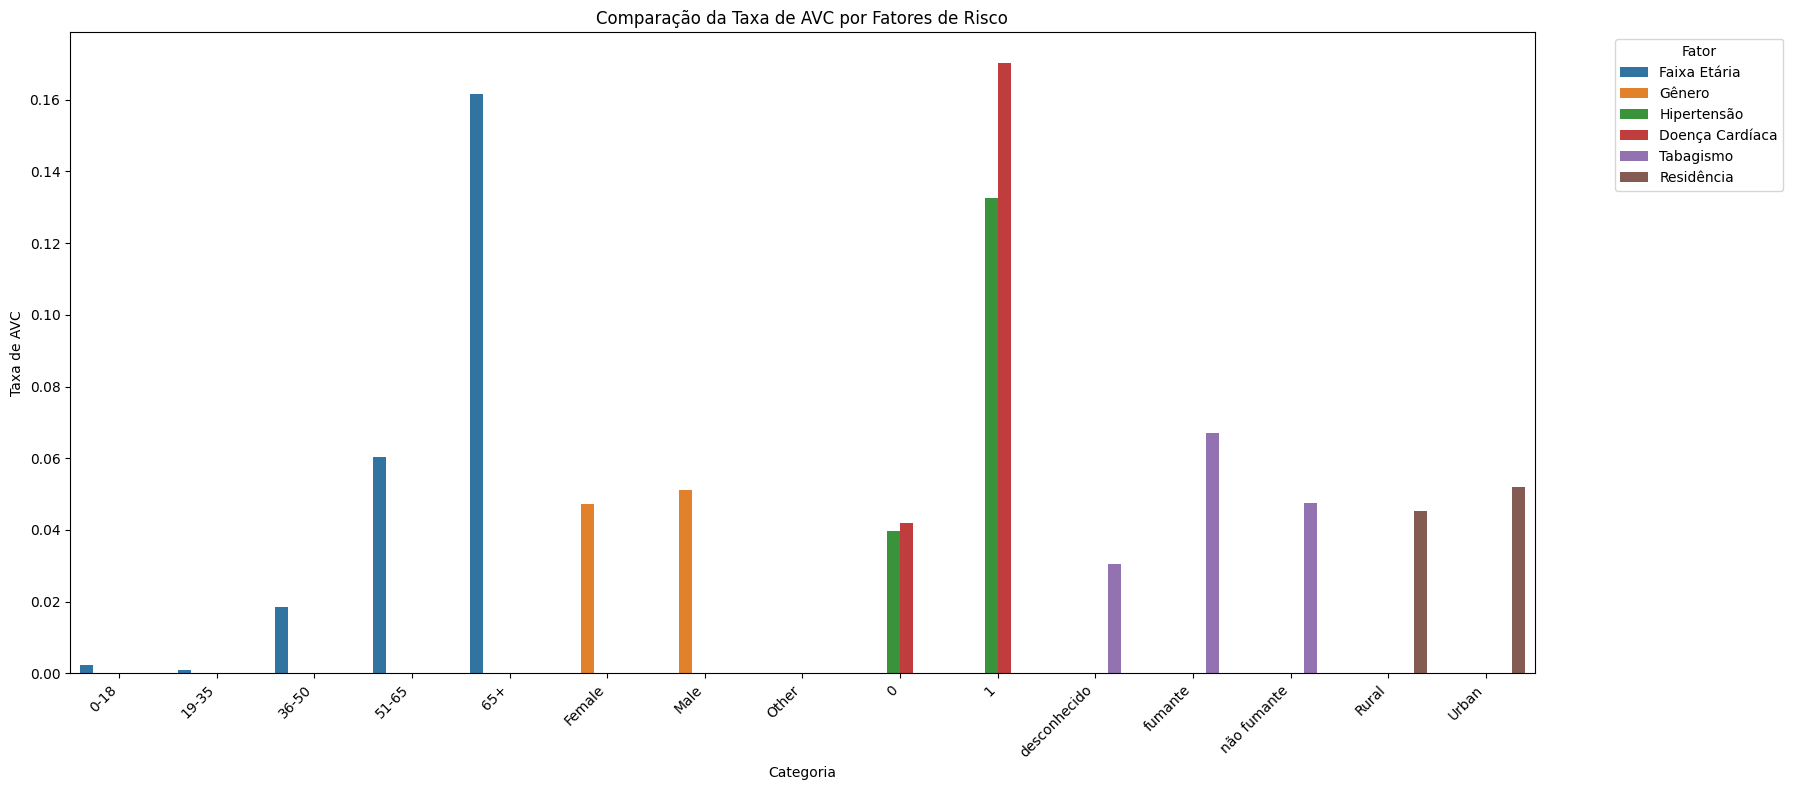

In [ ]:
# Plotar
plt.figure(figsize=(18, 8))
sns.barplot(data=df_comparativo, x='categoria', y='taxa_avc', hue='fator')

plt.title('Comparação da Taxa de AVC por Fatores de Risco')
plt.ylabel('Taxa de AVC')
plt.xlabel('Categoria')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Fator', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 6. Salvando arquivos para o Power BI
- `to_csv()` dos dataframes agregados

In [ ]:
# Tabela principal (completa, individual por paciente)
dado.to_csv("pacientes_completos.csv", index=False)

# Agregações por fator
df_avc_faixa_etaria.to_csv("taxa_avc_faixa_etaria.csv", index=False)
df_avc_genero.to_csv("taxa_avc_genero.csv", index=False)
df_avc_hipertensao.to_csv("taxa_avc_hipertensao.csv", index=False)
df_avc_cardiaco.to_csv("taxa_avc_doenca_cardiaca.csv", index=False)
df_avc_tabagista.to_csv("taxa_avc_tabagismo.csv", index=False)
df_avc_residencia.to_csv("taxa_avc_residencia.csv", index=False)

# (opcional) Gráfico comparativo unificado
df_comparativo.to_csv("taxa_avc_comparativo_fatores.csv", index=False)
